## **RECOGNIZE CLOTHING ITEMS**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

from keras.saving import save_model

### **Define the model**

**The model's goal**
- The neural network can feed in a 28 x 28 pixel array.
- The neurons in the middle layer will have weights and biases (w and b values) that when combined will match those pixels to one of the 10 output values.

In [2]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])

c:\Users\nguye\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Multiple neuron**

- **`Flatten`** is not a layer of neurons, but an input layer specification and takes that 'square' value (2D array) and turns it into a line (1D array).
- **`Dense`** is a layer of neurons and we're specifying that we want 128 of neurons to have their internal parameters randomly initialized. -> hidden layers if that are between the inputs and the outputs and are not seen by a caller, so the term **hidden** is used to describe them.

**Why 128?**

This is entirely arbitrary - there's no fixed rule for the number of neurons to use. As we design the layers we want ot pick the appropriate number of values to enable our model to actually learn. 

$\Rightarrow$ More neurons mean it will **run more slowly**, as it has to learn more parameters and it could also lead to a network that is great at recognizing the training data, but not so good at recognizing data that is hasn't previously seen (this is known as **over-fitting**). On the other hand, fewer neurons means that the model might not have sufficient parameters to learn.

**Solution**

It takes some experimentation over time to pick the right values => This process is typically called **`hyperparameter tuning`**.

In ML, a **`hyperparameter`** is a value that is used to control the training, as opposed to the internal values of the neurons that get trained/learn, which are referred to as **`parameters`**.

----

The **`activation function`** is code that will execute on each neuron in the layer.

$\Rightarrow$ TensorFlow supports a number of them, but a very common one in middle layers is **relu**, which stands for **rectified linear unit**. It's a simple function that just returns a value if it's greater than 0.

In this case, we do not want negative values being passed to the next layer to potentially impact the summing function, so instead of writing a lot of **`if-then`** code, we can simply activate the layer with **`relu`**

----

Finally, there's another **`Dense`** layer, which is the output layer.

- Because we have 10 classes $\rightarrow$ 10 neurons.
- Each of these neurons will end up with a probability that the input pixels match that class, so our job is to determine which one has a highest value.
- We could loop through them to pick that value, but the **`softmax`** activation function does that for us.

### **Load the dataset**

**The Data: Fashion MNIST**

One of the foundational datasets for learning and benchmarking algorithms is the Modified National Institute of Standards and Technology (MNIST) database, by Yann LeCun, Corinna Cortes, and Christopher Burges.

**Fashion MNIST** is designed to be a drop-in replacement for MNIST that has the same number of records, the same image dimensions, and the same number of classes - so, instead of images of the digits 0 through 9. Fashion MNIST contains images of 10 different types of clothing. 

<center>

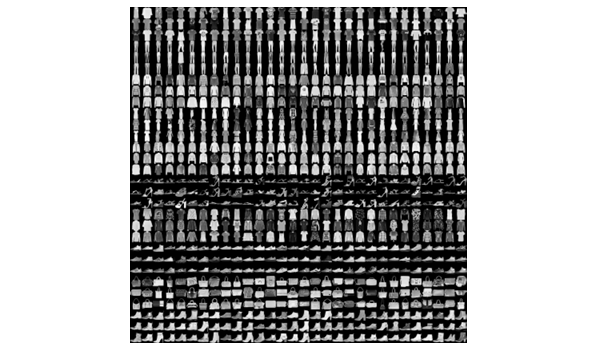

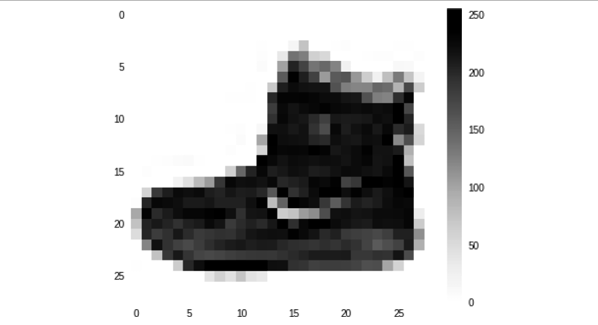

</center>

It’s **monochrome**, so each picture consists of a certain number of pixels with values between **0** and **255**. This makes the dataset simpler to manage. It’s a rectangular grid of pixels. In this case the grid size is **28 x 28**.

In this case, we do not have to handle downloading **70,000 images** and each image is **28 x 28 grayscale**. - splitting them into training and test sets and so on - all it takes is one line of code.

And we can call its **load_data** method to return our training and test sets.

In [3]:
data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = data.load_data()

In [4]:
print(f'Training images: {training_images.shape}')
print(f'Training labels: {training_labels.shape}')

print(f'Testing labels: {test_images.shape}')
print(f'Testing labels: {test_labels.shape}')

Training images: (60000, 28, 28)
Training labels: (60000,)
Testing labels: (10000, 28, 28)
Testing labels: (10000,)


**Normalization**

Our images in the dataset are grayscale, with values between 0 and 255 $\rightarrow$ Dividing by 255 thus ensures that every pixel is represented by a number between 0 and 1 instead. 

When training the neural network in TensorFlow that normalization will improve performance. If not, it will not learn and will have massive errors.

In [5]:
training_images = training_images / 255.0
test_images = test_images / 255.0

**Loss function**

The loss function is called **`sparse categorical cross entropy`** and it's one of the arsenal of loss functions that are built into TensorFlow.

=> Again, choosing which loss function to use is an art in itself, and over time we'll learn which ones are best to use in which scenarios.

One major difference between this model and the one we created is that instead of us trying to predict a single number, here we're picking a **category**. Our item of clothing will belong to 1 of 10 categories of clothing, and thus using a **`categorical loss function`** is the way to go. **`Spare categorical cross entropy`** is a good choice.

**Optimizer**

The same applies to choosing an optimizer.

The **`adam`** optimizer is an evolution of the **`stochastic gradient descent (sgd)`** optimizer because it has been shown to be faster and more efficient.

As we're handling 60,000 training images, any performance improvement we can get will be helpful, so that one is chosen here.

**Metrics**

A new line specifying the metrics we want to report is also present in this code.

Here, we want to report back on the accuracy of the network as we're training.
- In this case, it's more useful to us to see how the network is learning by looking at the accuracy - where it will return how often it correctly matched the input pixels to the output labels.

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7823 - loss: 0.6335
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8617 - loss: 0.3863
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8768 - loss: 0.3398
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8831 - loss: 0.3186
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8924 - loss: 0.2960
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8957 - loss: 0.2832
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8993 - loss: 0.2697
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9039 - loss: 0.2595
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9087 - loss: 0.2455
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9099 - loss: 0.2419


**Evaluate the model**

We have a set of 10,000 images and labels for testing and we can pass them to the trained model to have it predict what it thinks each image is, compare that to its actual label, ans sum up the results.

In [8]:
model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8849 - loss: 0.3299


[0.32964375615119934, 0.8855999708175659]

In [9]:
classifications = model.predict(test_images)

print(f"The probability of item's category: {classifications[0]}")
print(f"True label: {test_labels[0]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step
The probability of item's category: [1.3976031e-06 7.9659779e-10 4.2892263e-09 9.6200489e-13 4.6782818e-09
 2.9109919e-03 8.8292014e-09 3.0028711e-03 5.6035102e-08 9.9408478e-01]
True label: 9


### **Some improvements**

**Early stopping**

**Problem**: Training for too much epochs might lead to overfitting

**Solution**: Early stopping

In [10]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop after 5 epochs without improvement
    restore_best_weights=True
)
model.fit(training_images, training_labels, validation_data=(test_images, test_labels), epochs=100, callbacks=[early_stopping])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9146 - loss: 0.2320 - val_accuracy: 0.8842 - val_loss: 0.3329
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9137 - loss: 0.2294 - val_accuracy: 0.8817 - val_loss: 0.3315
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9168 - loss: 0.2166 - val_accuracy: 0.8841 - val_loss: 0.3460
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9218 - loss: 0.2086 - val_accuracy: 0.8860 - val_loss: 0.3412
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9234 - loss: 0.2002 - val_accuracy: 0.8859 - val_loss: 0.3518
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9252 - loss: 0.1985 - val_accuracy: 0.8870 - val_loss: 0.3329
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9276 - loss: 0.1910 - val_accuracy: 0.8918 - val_loss: 0.3355


**Validation split**

**Problem**: During training, reserve a portion of the training data for validation. This will help monitor performance without overfitting on the test set

**Solution**: Validation split

In [11]:
model.fit(training_images, training_labels, validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9179 - loss: 0.2197 - val_accuracy: 0.9180 - val_loss: 0.2235
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9211 - loss: 0.2097 - val_accuracy: 0.8958 - val_loss: 0.2820
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9248 - loss: 0.2001 - val_accuracy: 0.9118 - val_loss: 0.2350
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9279 - loss: 0.1945 - val_accuracy: 0.9097 - val_loss: 0.2453
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9318 - loss: 0.1866 - val_accuracy: 0.9062 - val_loss: 0.2476
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9336 - loss: 0.1820 - val_accuracy: 0.9140 - val_loss: 0.2347
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9342 - loss: 0.1762 - val_accuracy: 0.9146 - val_loss: 0.2303
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9349 - loss: 0.1768 - 

**Learning Rate Adjustment**

Experiment with learning rate schedulers to fine-tune training dynamics

In [12]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(-epoch / 20))

**Data Augmentation**

Augment the dataset to improve generalization (e.g., random rotations, flips, or zooms)

In [13]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
])

**Evaluate Generalization**

In [14]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8923 - loss: 0.3693
Test Accuracy: 0.89


**Model Saving**

In [15]:
save_model(model, "fashion_mnist_model.keras")